# Lab 3 : Edge Detection
#### Name:- Sruthi Nayagi 
#### Reg.no:- 19BAI1037 
#### Subject:- Computer Vision in Healthcare Application (CSE4038) 
#### Faculty-In-Charge:- Dr.BALASUNDARAM A
#### Lab Slot:- L27+L28 
#### Date of Submission:- 04/2/2022
#### Dataset Used:- Chest X-ray 

In [1]:
import cv2
from matplotlib import pyplot as plt
import nibabel as nib
import numpy as np
from scipy import ndimage
from keras.preprocessing import image
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
image = cv2.imread('/content/gdrive/MyDrive/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
image = cv2.resize(image, (256, 256))

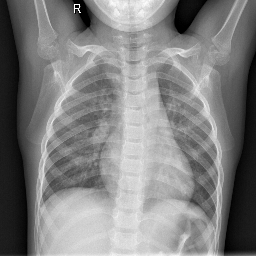

In [5]:
cv2_imshow(image)

**Sobel Edge detector**

In [6]:
BlurredImage = cv2.GaussianBlur(image, (3,3), 0)

In [7]:
sobelx = cv2.Sobel(src=BlurredImage, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge
sobely = cv2.Sobel(src=BlurredImage, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge
sobelxy = cv2.Sobel(src=BlurredImage, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X

In [8]:
titles = ['Sobel X','Sobel Y','Sobel XY']
images = [sobelx,sobely,sobelxy]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


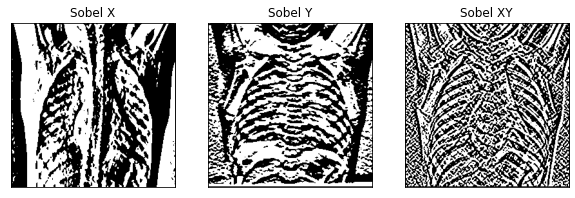

In [9]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

The Sobel X and Sobel Y images highlights both the foreground and the background pixels whereas the Sobel XY highlights only the foreground pixels.

**Modifying the parameters**

In [10]:
sobelx_3 = cv2.Sobel(src=BlurredImage, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge
sobely_3 = cv2.Sobel(src=BlurredImage, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge
sobelxy_3 = cv2.Sobel(src=BlurredImage, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X

sobelx_5 = cv2.Sobel(src=BlurredImage, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge
sobely_5 = cv2.Sobel(src=BlurredImage, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge
sobelxy_5 = cv2.Sobel(src=BlurredImage, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X

sobelx_7 = cv2.Sobel(src=BlurredImage, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=7) # Sobel Edge
sobely_7 = cv2.Sobel(src=BlurredImage, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=7) # Sobel Edge
sobelxy_7 = cv2.Sobel(src=BlurredImage, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=7) # Combined X

In [11]:
titles = ['Sobel X 3','Sobel Y 3','Sobel XY 3','Sobel X 5','Sobel Y 5','Sobel XY 5','Sobel X 7','Sobel Y 7','Sobel XY 7']
images = [sobelx_3,sobely_3,sobelxy_3,sobelx_5,sobely_5,sobelxy_5,sobelx_7,sobely_7,sobelxy_7]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


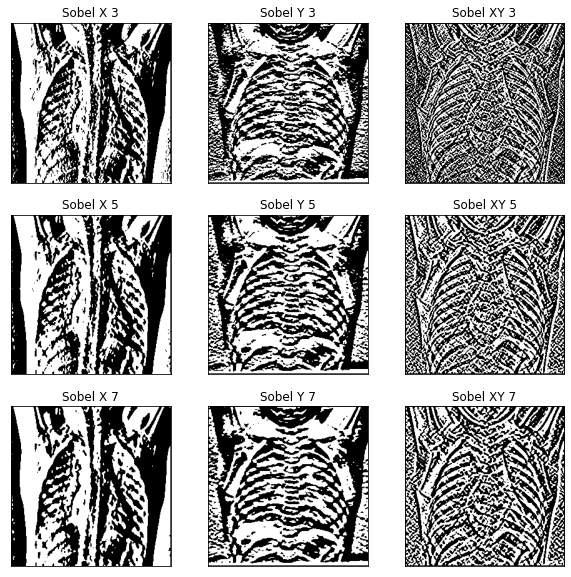

In [12]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In Sobel 3, very less edges are detected.

In Sobel 5, the proper number of edges has been detected.

In Sobel 7, the background features are aslo been detected.

**Prewitt edge detector**

In [13]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

In [14]:
prewittX = cv2.filter2D(BlurredImage, -1, kernelx)
prewittY = cv2.filter2D(BlurredImage, -1, kernely)

In [15]:
titles = ['Prewitt x', 'Prewitt y']
images = [prewittX,prewittY]

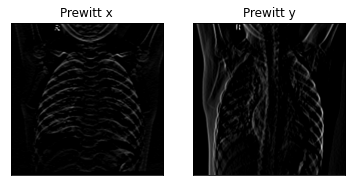

In [16]:
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In PrewittX(horizontal) kernel, all the horizontal edges has been highlighted.

In PrewittY(vertical) kernel, all the vertical edges has been highlighted.

**New kernel**

In [17]:
kernelxy = np.array([[1,0,0,-1],[0,1,-1,0],[0,-1,1,0],[-1,0,0,1]])

In [18]:
prewittXY = cv2.filter2D(BlurredImage, -1, kernelxy)

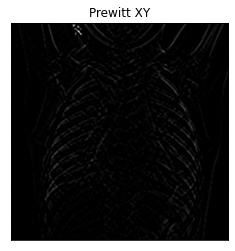

In [19]:
plt.imshow(prewittXY,'gray',vmin=0,vmax=255)
plt.title("Prewitt XY")
plt.xticks([])
plt.yticks([])
plt.show()

In perwittXY, the image is not seen.

**Laplacian edge detector**

In [20]:
ddepth = cv2.CV_16S
kernel_size = 3

In [21]:
laplacianImage = cv2.Laplacian(BlurredImage,cv2.CV_64F,ksize = kernel_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


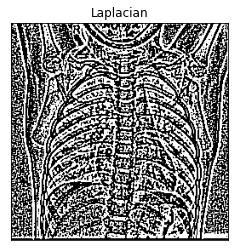

In [22]:
plt.imshow(laplacianImage,'gray',vmin=0,vmax=255)
plt.title("Laplacian")
plt.xticks([])
plt.yticks([])
plt.show()

In Laplacian, the edges outside of the chest X-ray Image is highlighted more than the edges inside the brain.

**Modifying the parameters**

In [23]:
laplacian_3 = cv2.Laplacian(BlurredImage,cv2.CV_64F,ksize = 3)
laplacian_5 = cv2.Laplacian(BlurredImage,cv2.CV_64F,ksize = 5)
laplacian_7 = cv2.Laplacian(BlurredImage,cv2.CV_64F,ksize = 7)

In [24]:
titles = ['Laplacian 3','Laplacian 5','Laplacian 7']
images = [laplacian_3,laplacian_5,laplacian_7]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


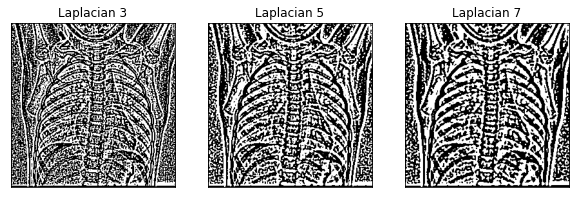

In [25]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In Laplacian 3, A proper detection of the foreground edges.

In Laplacian 5, Foreground pixels inside the brain is visible along with the background pixels.

In Laplacian 7, Both foreground and background pixels are now visible.

**Canny edge detector**

In [26]:
cannyImage = cv2.Canny(BlurredImage,100,200)

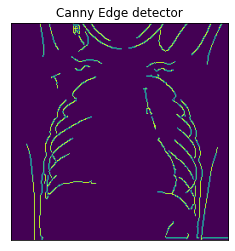

In [27]:
plt.imshow(cannyImage)
plt.title("Canny Edge detector")
plt.xticks([])
plt.yticks([])
plt.show()

In Canny edge detector, the entire image is pixelated. A few of the background pixels has also been detected.

**Modifying the parameters**

In [28]:
canny_1 = cv2.Canny(BlurredImage,100,200)
canny_2 = cv2.Canny(BlurredImage,50,100)
canny_3 = cv2.Canny(BlurredImage,200,300)

In [29]:
titles = ['Canny 100-200','Canny 50-100','Canny 200-300']
images = [canny_1,canny_2,canny_3]

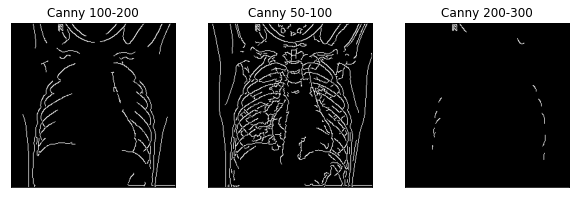

In [30]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In Canny 100-200, The entire image is pixelated. A few of the background pixels has also been detected.

In Canny 50-100, not able to clearly distinguish between the foreground and the background pixels.

In Canny 200-300, only a very less of the foreground pixels are highlighted.

**Comaparitative results**

In [31]:
ResultedImages=[image,sobelx,sobely,sobelxy,sobelx_3,sobely_3,sobelxy_3,sobelx_5,sobely_5,sobelxy_5,sobelx_7,sobely_7,sobelxy_7,prewittX,prewittY,prewittXY,laplacianImage,laplacian_3,laplacian_5,laplacian_7,cannyImage,canny_1,canny_2,canny_3]
titles=['Original Image','Sobel X','Sobel Y','Sobel XY','Sobel X 3','Sobel Y 3','Sobel XY 3','Sobel X 5','Sobel Y 5','Sobel XY 5','Sobel X 7','Sobel Y 7','Sobel XY 7','Prewitt x', 'Prewitt y','Prewitt XY',"Laplacian",'Laplacian 3','Laplacian 5','Laplacian 7',"Canny",'Canny 100-200','Canny 50-100','Canny 200-300']

In [32]:
len(ResultedImages)

24

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

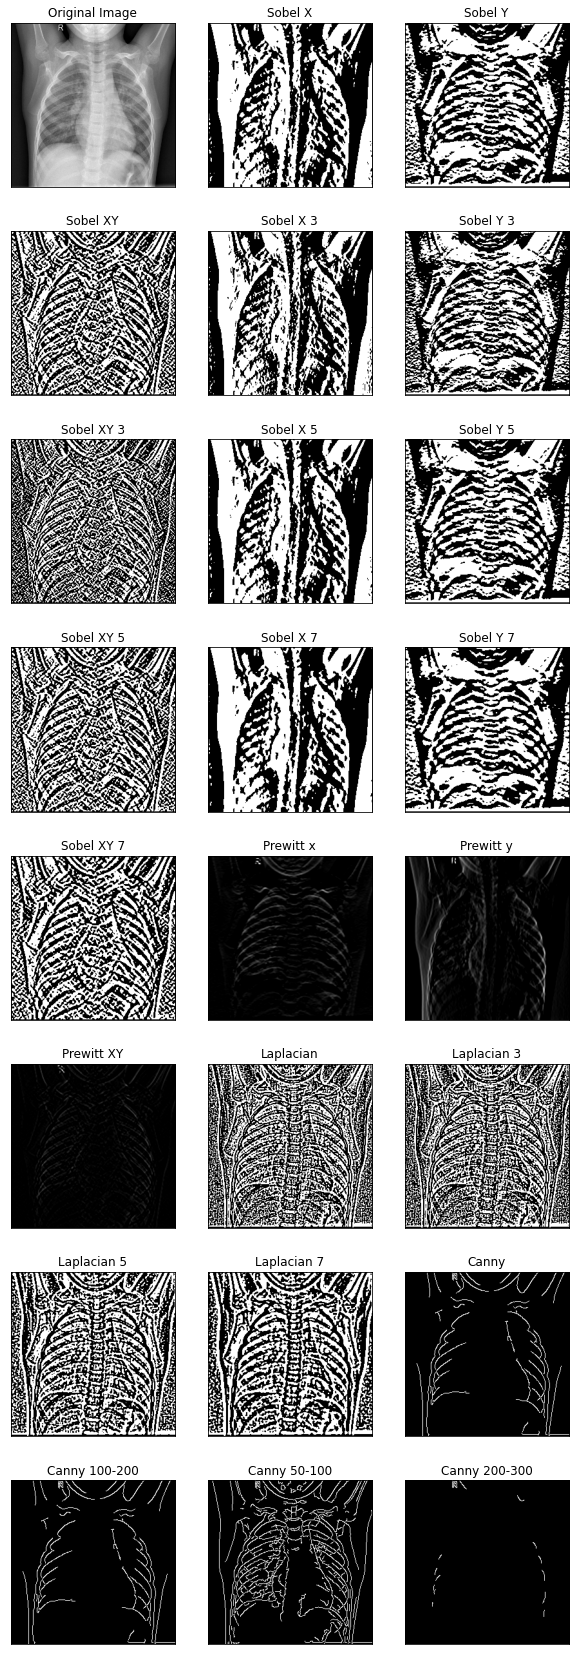

In [33]:
plt.figure(figsize=(10,30))
for i in range(24):
    plt.subplot(8,3,i+1),plt.imshow(ResultedImages[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Inference:
All the different types of edge detetors has been implemented and plotted. The `Laplacian 7` highlights the edges relatively higher compared to other edge detectors.